In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
path = 'yelp_data/health_text_sentiment.csv'
path2 = 'yelp_data/health_raw00.csv'

df = pd.read_csv(path)
df2 = pd.read_csv(path2)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df2.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 7 columns):
stars               64006 non-null int64
text                64006 non-null object
sent_value          64006 non-null float64
sent_score          64006 non-null object
clean_text          64006 non-null object
sent_value_clean    64006 non-null float64
sent_score_clean    64006 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 3.4+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 13 columns):
business_id        64006 non-null object
categories         64006 non-null object
name               64006 non-null object
state              64006 non-null object
categories_list    64006 non-null object
cool               64006 non-null int64
date               64006 non-null object
funny              64006 non-null int64
review_id          64006 non-null object
stars              64006 non-null int64
text               64006 non-null object
useful             64006 non-null int64
user_id            64006 non-null object
dtypes: int64(4), object(9)
memory usage: 6.3+ MB


In [8]:
df.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,1,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
2,4,Dr. Byrne is a great doctor! She has great bed...,0.513333,positive,dr byrne great doctor great bed side manner ex...,0.317778,positive
3,3,I'm raising my review as Dr Bryne's has been m...,-0.035714,negative,raise review dr bryne receptive daughter go an...,0.002806,positive
4,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative


In [9]:
df2.head()

,business_id,categories,name,state,categories_list,cool,date,funny,review_id,stars,text,useful,user_id
0,y-4xTZNKVm8mAZpiXMS5ZA,"urologists, doctors, health & medical","Lauren Byrne, MD",AZ,"['urologists', ' doctors', ' health & medical']",0,2018-03-03,0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w
1,y-4xTZNKVm8mAZpiXMS5ZA,"urologists, doctors, health & medical","Lauren Byrne, MD",AZ,"['urologists', ' doctors', ' health & medical']",0,2015-11-29,0,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA
2,y-4xTZNKVm8mAZpiXMS5ZA,"urologists, doctors, health & medical","Lauren Byrne, MD",AZ,"['urologists', ' doctors', ' health & medical']",0,2016-06-03,0,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,2,sZVHm1aLtvyH9trAc2_MgA
3,y-4xTZNKVm8mAZpiXMS5ZA,"urologists, doctors, health & medical","Lauren Byrne, MD",AZ,"['urologists', ' doctors', ' health & medical']",0,2017-03-17,0,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,3,8Y_irXocZdZxLs_qgzpjBw
4,y-4xTZNKVm8mAZpiXMS5ZA,"urologists, doctors, health & medical","Lauren Byrne, MD",AZ,"['urologists', ' doctors', ' health & medical']",0,2016-08-31,0,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,1,hVKPDGpG12z7vpScXaSakw


## `business_id`
- 4572 unique business

In [ ]:
df2.business_id.value_counts(dropna=False)

In [4]:
len(df2.business_id.value_counts(dropna=False))

4572

In [5]:
len(df2.business_id.unique())

4572

# state

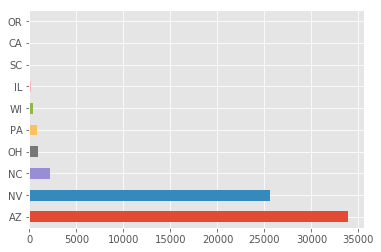

In [10]:
df2.state.value_counts().plot('barh')

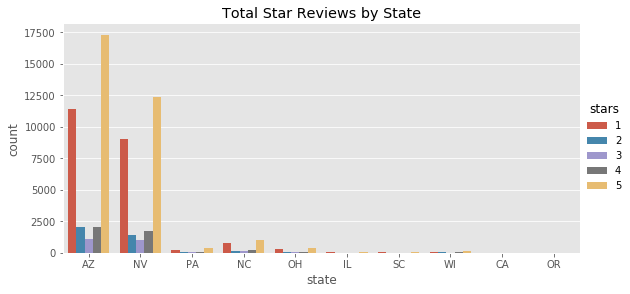

In [11]:
fc = sns.factorplot(x="state", 
                    hue="stars", 
                    data=df2, kind="count",size=4, aspect=2,legend=True)
plt.title("Total Star Reviews by State")
plt.show()

In [12]:
# top states
top = df2[(df2['state'] == 'AZ') | (df2['state'] == 'NV')]

# rest
rest = df2[~((df2['state'] == 'AZ') | (df2['state'] == 'NV'))]

In [13]:
top.state.unique()

array(['AZ', 'NV'], dtype=object)

In [14]:
rest.state.unique()

array(['PA', 'NC', 'OH', 'IL', 'SC', 'WI', 'CA', 'OR'], dtype=object)

In [15]:
top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59488 entries, 0 to 64005
Data columns (total 13 columns):
business_id        59488 non-null object
categories         59488 non-null object
name               59488 non-null object
state              59488 non-null object
categories_list    59488 non-null object
cool               59488 non-null int64
date               59488 non-null object
funny              59488 non-null int64
review_id          59488 non-null object
stars              59488 non-null int64
text               59488 non-null object
useful             59488 non-null int64
user_id            59488 non-null object
dtypes: int64(4), object(9)
memory usage: 6.4+ MB


In [16]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 218 to 63914
Data columns (total 13 columns):
business_id        4518 non-null object
categories         4518 non-null object
name               4518 non-null object
state              4518 non-null object
categories_list    4518 non-null object
cool               4518 non-null int64
date               4518 non-null object
funny              4518 non-null int64
review_id          4518 non-null object
stars              4518 non-null int64
text               4518 non-null object
useful             4518 non-null int64
user_id            4518 non-null object
dtypes: int64(4), object(9)
memory usage: 494.2+ KB


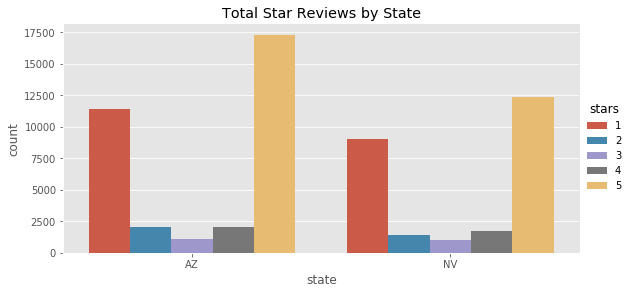

In [17]:
fc = sns.factorplot(x="state", 
                    hue="stars", 
                    data=top, kind="count",size=4, aspect=2,legend=True)
plt.title("Total Star Reviews by State")
plt.show()

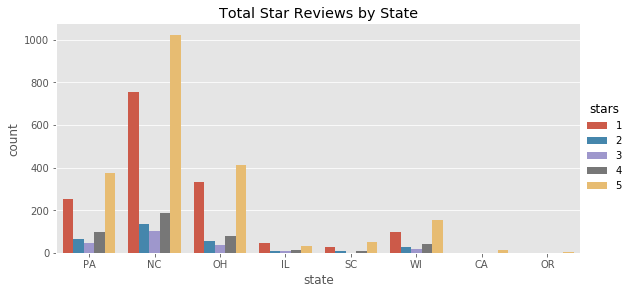

In [18]:
fc = sns.factorplot(x="state", 
                    hue="stars", 
                    data=rest, kind="count",size=4, aspect=2,legend=True)
plt.title("Total Star Reviews by State")
plt.show()

In [ ]:
onestar = top[top.stars == 1]

In [ ]:
len(onestar.business_id.unique())

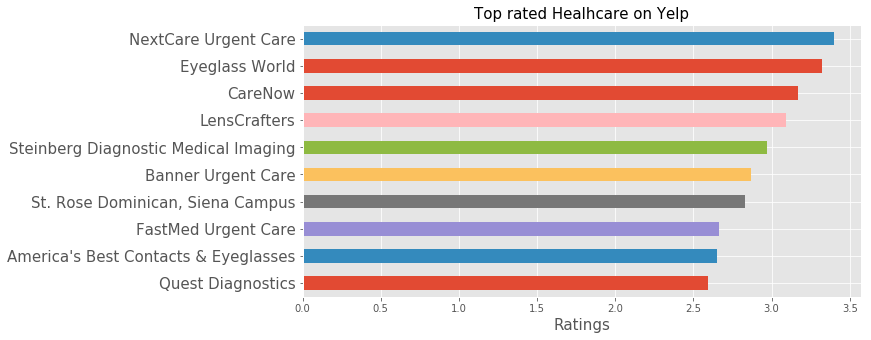

In [34]:
top_locations = df2.name.value_counts().index[:10].tolist()
df_review_top = df2.loc[df2['name'].isin(top_locations)]

df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(10, 5))
plt.yticks(fontsize=15)
plt.ylabel('')
# set the title of the graph
plt.title('Top rated Healhcare on Yelp',fontsize=15)
plt.xlabel('Ratings', fontsize=15)
plt.show()

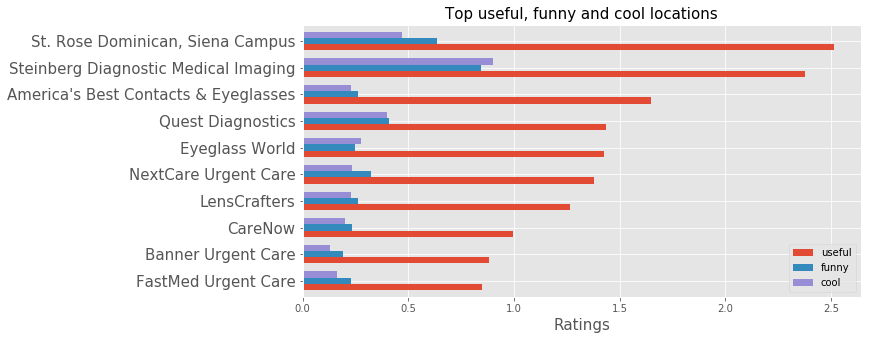

In [39]:
top_locations = df2.name.value_counts().index[:10].tolist()
df_review_top = df2.loc[df2['name'].isin(top_locations)]

df_review_top.groupby(df_review_top.name)[['useful','funny', 'cool']].mean().sort_values('useful',ascending=True).plot(kind='barh', figsize=(10, 5),width=0.7)
plt.yticks(fontsize=15)
plt.ylabel('')
# set the title of the graph
plt.title('Top useful, funny and cool locations',fontsize=15)
plt.xlabel('Ratings', fontsize=15)
plt.show()

In [ ]:
#!pip install wordcloud

In [41]:
one_star = df[df.stars == 1]
five_star = df[df.stars == 5]

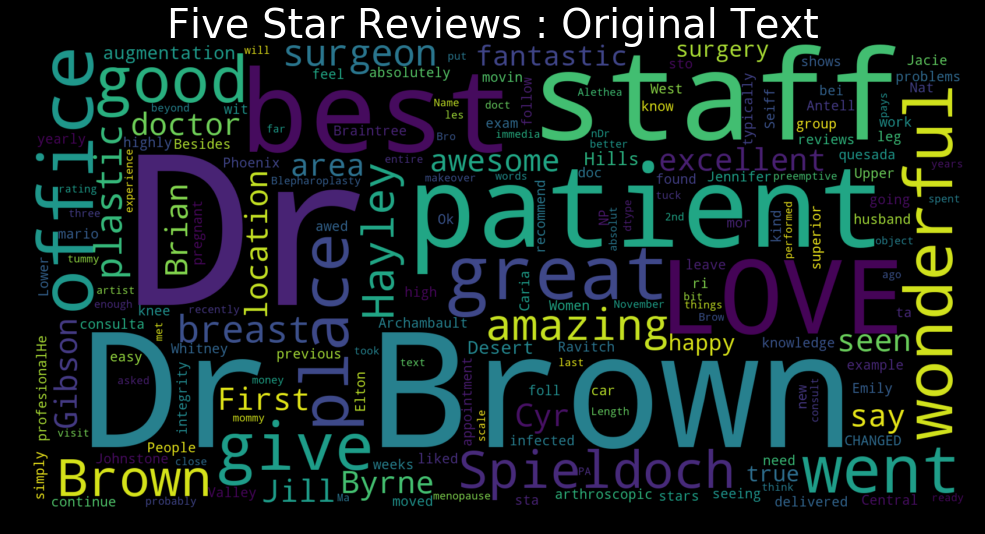

In [42]:
from wordcloud import WordCloud
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(five_star['text']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Five Star Reviews : Original Text ", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

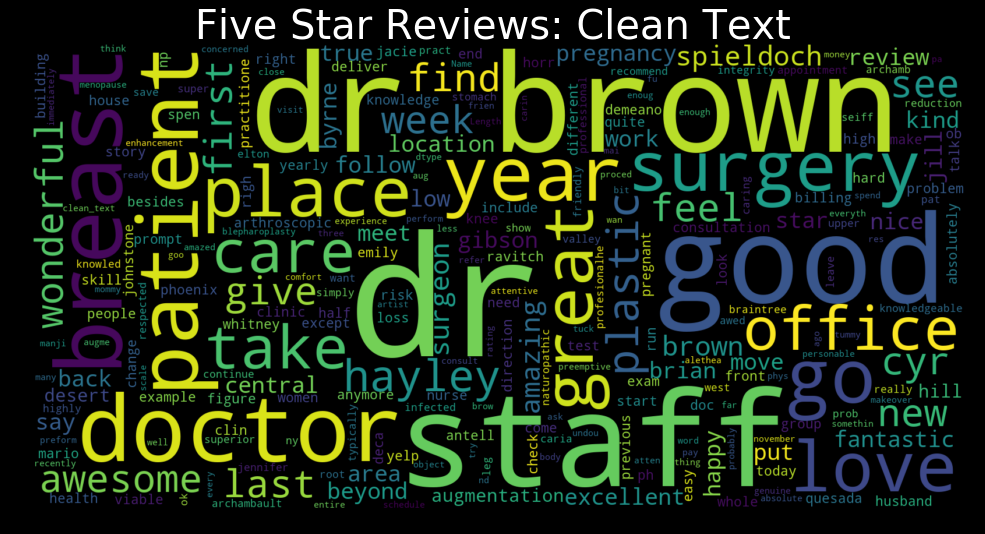

In [43]:
from wordcloud import WordCloud
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(five_star['clean_text']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Five Star Reviews: Clean Text ", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

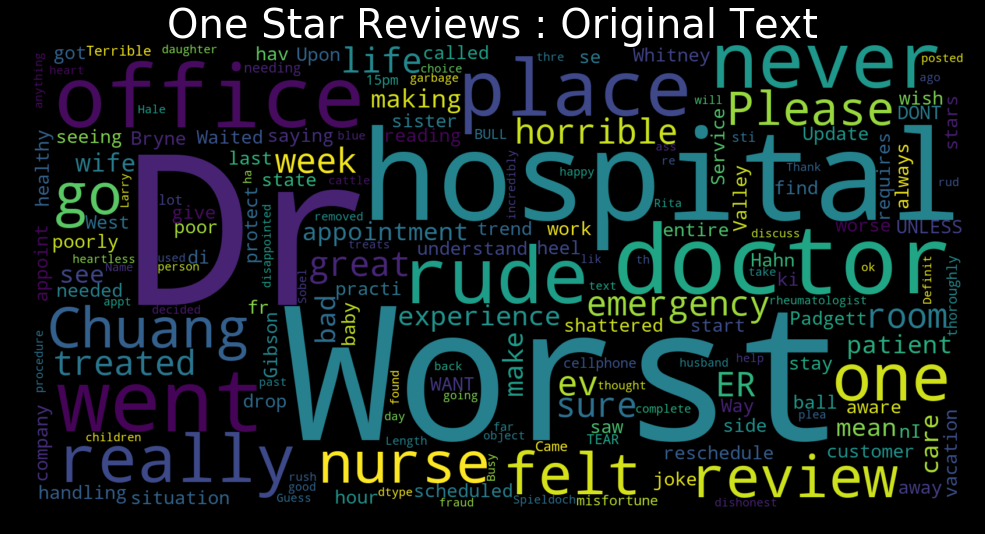

In [44]:
from wordcloud import WordCloud
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(one_star['text']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("One Star Reviews : Original Text ", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

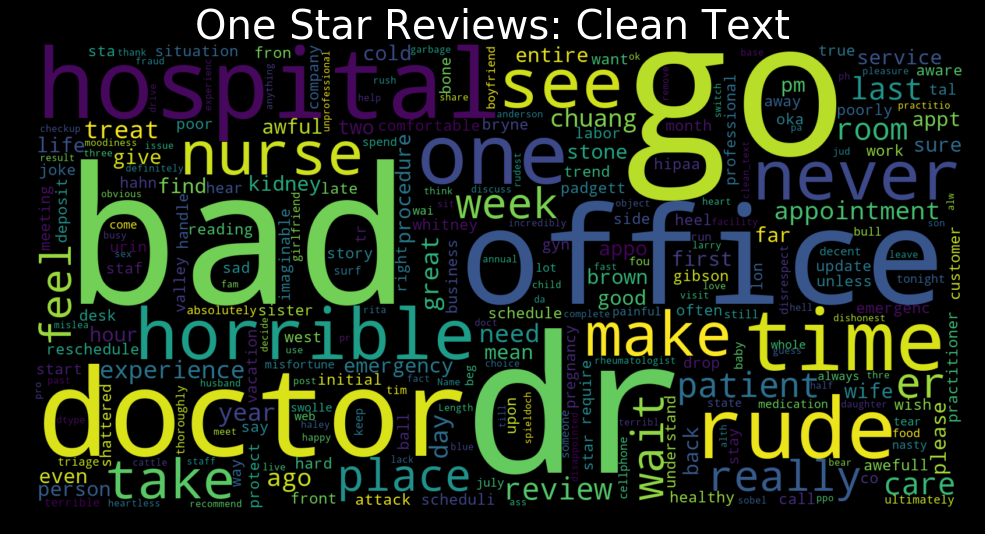

In [45]:
from wordcloud import WordCloud
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(one_star['clean_text']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("One Star Reviews: Clean Text ", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

In [47]:
by_state = df2.groupby('state')


In [48]:
!pip install squarify

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
smart-open 1.6.0 requires bz2file, which is not installed.
mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.4 requires cython, which is not installed.
spacy 2.0.12 has requirement regex==2017.4.5, but you'll have regex 2017.11.9 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


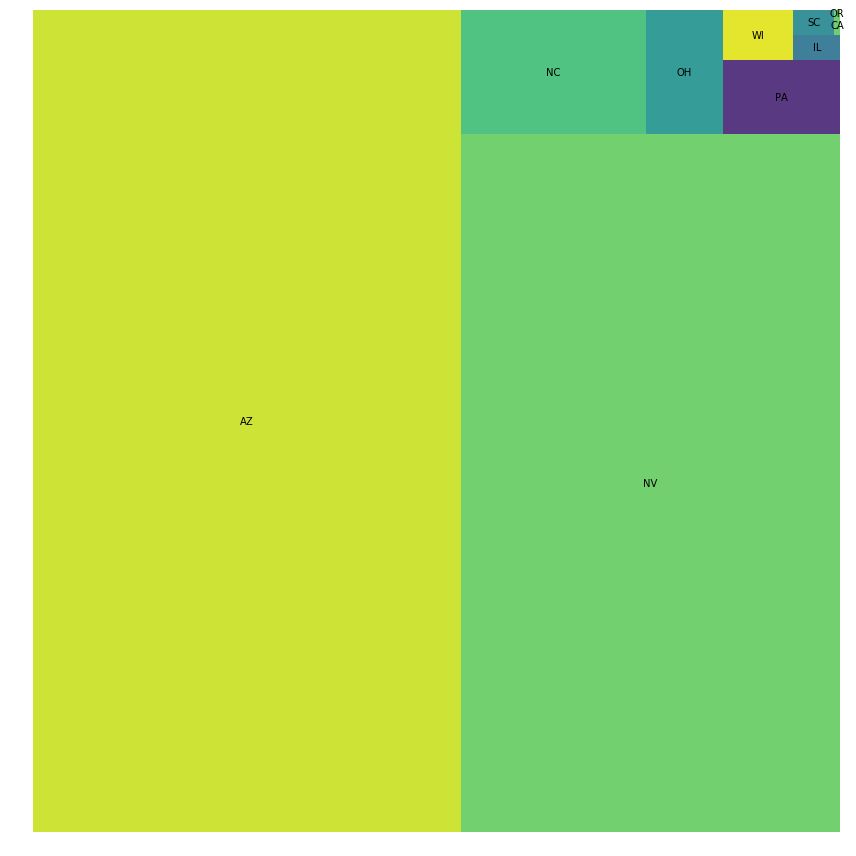

In [49]:
import squarify    # pip install squarify (algorithm for treemap)
plt.figure(figsize=(12,12))

a = by_state['business_id'].count()

a.sort_values(ascending=False,inplace=True)

squarify.plot(sizes= a[0:15].values, label= a[0:15].index, alpha=0.9)

plt.axis('off')
plt.tight_layout()

In [52]:
%%time
business_cats=','.join(df2['categories'])

CPU times: user 0 ns, sys: 15.6 ms, total: 15.6 ms
Wall time: 8.14 ms


In [53]:
%%time
cats=pd.DataFrame(business_cats.split(','),columns=['category'])
cats_ser = cats.category.value_counts()


cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)

CPU times: user 109 ms, sys: 46.9 ms, total: 156 ms
Wall time: 144 ms


In [85]:
cats_df.head()

,index,category
0,health & medical,45479
1,doctors,45040
2,health & medical,18527
3,doctors,14535
4,medical centers,11387


In [79]:
cats_df['index'] = cats_df['index'].str.strip()

In [80]:
tt = cats_df['index'].value_counts().index[:10].tolist()
tt

['anesthesiologists',
 'gerontologists',
 'naturopathic/holistic',
 'addiction medicine',
 'nephrologists',
 'podiatrists',
 'laboratory testing',
 'cosmetic surgeons',
 'orthotics',
 'walk-in clinics']

In [71]:
cats_df.sort_values(by=['category'],ascending=False,inplace=True)


In [86]:
cats_df

,index,category
0,health & medical,45479
1,doctors,45040
2,health & medical,18527
3,doctors,14535
4,medical centers,11387
5,urgent care,7966
6,family practice,6812
7,hospitals,5341
8,obstetricians & gynecologists,4648
9,optometrists,4115


Text(0.5,0,'Number of businesses')

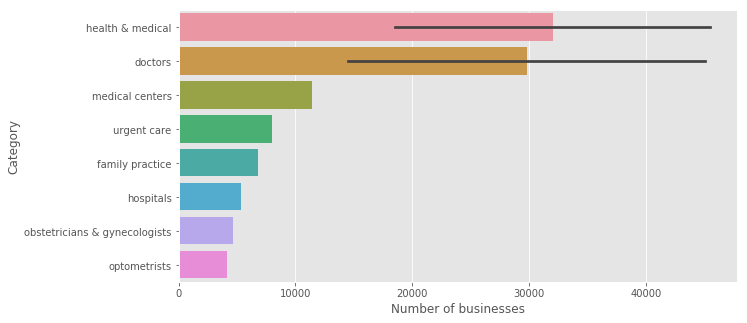

In [81]:
plt.figure(figsize=(10,5))
f = sns.barplot( y= 'index',x = 'category' , data = cats_df.iloc[0:10])
f.set_ylabel('Category')
f.set_xlabel('Number of businesses')

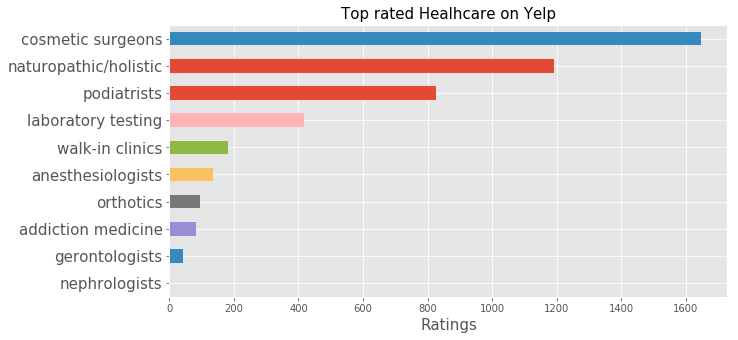

In [82]:
top_locations = cats_df['index'].value_counts().index[:10].tolist()
df_review_top = cats_df.loc[cats_df['index'].isin(top_locations)]

df_review_top.groupby(df_review_top['index'])['category'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(10, 5))
plt.yticks(fontsize=15)
plt.ylabel('')
# set the title of the graph
plt.title('Top rated Healhcare on Yelp',fontsize=15)
plt.xlabel('Ratings', fontsize=15)
plt.show()

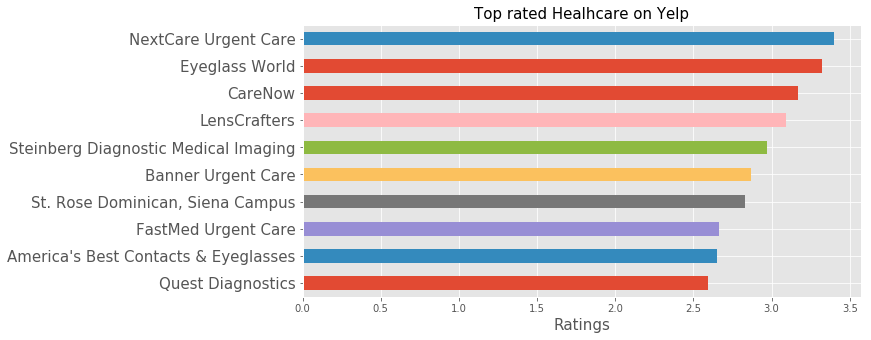

In [87]:
top_locations = df2.name.value_counts().index[:10].tolist()
df_review_top = df2.loc[df2['name'].isin(top_locations)]

df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(10, 5))
plt.yticks(fontsize=15)
plt.ylabel('')
# set the title of the graph
plt.title('Top rated Healhcare on Yelp',fontsize=15)
plt.xlabel('Ratings', fontsize=15)
plt.show()